In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
cu=pd.read_csv('/home/jlhb1984/py-projects/data/proing/Customer-Units.csv',sep=';',encoding='latin1')
cu['Peripherals'].fillna('Empty',inplace=True)
cu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       497 non-null    int64  
 1   Owner                    497 non-null    object 
 2   Unit ID                  497 non-null    object 
 3   Unit                     497 non-null    object 
 4   Peripherals              497 non-null    object 
 5   BillingPeriod            495 non-null    object 
 6   Reporting Status         0 non-null      float64
 7   Show Until               0 non-null      float64
 8   Billing Group            2 non-null      object 
 9   Last Event Date          497 non-null    object 
 10  Monthly Fee              497 non-null    int64  
 11  Bill To                  3 non-null      object 
 12  Assigned To              497 non-null    object 
 13  Linked Mode              497 non-null    int64  
 14  Paired GPS               0

/tmp/ipykernel_77525/4170306377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cu['Peripherals'].fillna('Empty',inplace=True)


In [79]:
cu_peripherals=cu[cu['Peripherals'].str.contains('Fuel')]
cu_peripherals[['IMEI','Last Event Date','Unit','Unit Type']]

,IMEI,Last Event Date,Unit,Unit Type
71,359369091357604,26/12/2025,WGH169,CalAmp 2630 - HSPA -LMU26H3001-G1000
175,354514101195719,24/12/2025,POZ553,CalAmp 2630 - GEMALTO HSPA -LMU26H3001-JAM01


wgh169

In [103]:
hl_wgh169=pd.read_csv('/home/jlhb1984/py-projects/data/proing/hlwgh169.csv',sep=';',encoding='latin1')
hl_wgh169.info()
hl_wgh169['Eventos'].value_counts(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Secuencia       3411 non-null   int64  
 1   Unidad          3411 non-null   object 
 2   Eventos         3411 non-null   object 
 3   Fecha           3411 non-null   object 
 4   Pt. Referencia  236 non-null    object 
 5   Dirección       3411 non-null   object 
 6   Velocidad       3411 non-null   int64  
 7   Temperatura     0 non-null      float64
 8   Conductor       0 non-null      float64
 9   Latitud         3411 non-null   float64
 10  Longitud        3411 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 293.3+ KB


Eventos
Conduciendo              1287
Inicio de Viaje           667
Viaje detenido            651
Estacionado               212
Inmóvil - Detenido        156
Ignición Apagada          136
Ignición Encendida        136
Alerta de Inmovilidad      61
Saliendo de Landmark       33
Entrando a Landmark        29
Entrada a Geocerca         22
Salida de Geocerca         17
Giro Brusco                 1
Fin de alta velocidad       1
Alta velocidad              1
Desaceleración              1
Name: count, dtype: int64

In [85]:
raw_fuel_data=pd.read_csv('/home/jlhb1984/py-projects/data/proing/wgh169.csv',sep=';',encoding='latin1')
raw_fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Created  3525 non-null   object
 1   Message  3525 non-null   object
 2   Status   3525 non-null   object
dtypes: object(3)
memory usage: 82.7+ KB


In [87]:
e0x=raw_fuel_data[raw_fuel_data['Status'].str.contains('3E0')]
row_number=e0x.shape[0]

In [88]:
fs01_dec_value=[]
fs02_dec_value=[]

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E01')
    if len(e0x_aux)>0:
        fs01=(e0x_aux[aux:aux+18])
        if len(fs01)>17:
            msb=fs01[10:12]
            lsb=fs01[8:10]
            measure=msb+lsb
            fs01_dec_value.append(int(measure,16))

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E02')
    if len(e0x_aux)>0:
        fs02=e0x_aux[aux:aux+18]
        if len(fs02)>17:
            msb=fs02[10:12]
            lsb=fs02[8:10]
            measure=msb+lsb
            fs02_dec_value.append(int(measure,16))
            
        #print(fs01_cad)   

fs01_count=len(fs01_dec_value)
fs02_count=len(fs02_dec_value)
print('Fuel sesnor 1: ',fs01_dec_value,fs01_count)
print('Fuel sesnor 2: ',fs02_dec_value,fs02_count)

Fuel sesnor 1:  [33290, 36877, 28688, 12301, 12298, 53521, 534, 534, 534, 2327, 20502, 12299, 12299, 20747, 21000, 16395, 53513, 8203, 8203, 37394, 36876, 40975, 45060, 45060, 57362, 57621, 45075, 20992, 4609, 2359, 33291, 11, 57616, 49165, 57354, 28682, 3978, 49164, 12297, 45076, 20499, 4609, 53520, 53520, 53520, 53520, 33041, 33041, 12310, 20499, 28677] 51
Fuel sesnor 2:  [24854, 29206, 12291, 8212, 54253, 54126, 54121, 54030, 54089, 25089, 8205, 61962, 53513, 45068, 37135, 20480, 24854, 54132, 12806, 54215, 54256, 41481, 49423, 54096, 61714, 53254, 16662, 54221, 54053, 54066, 54159, 61713, 54210] 33


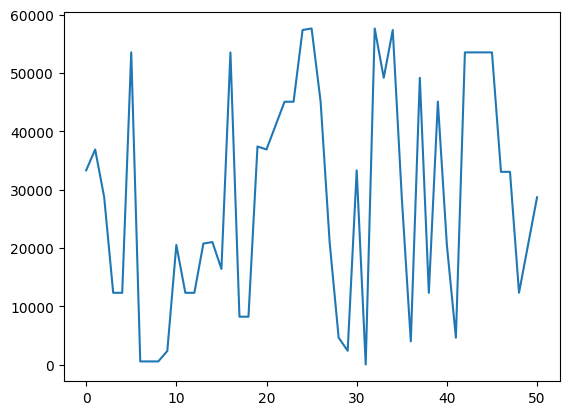

In [89]:
fs01_x_values=[]
fs02_x_values=[]

for i in range(0,fs01_count):
    fs01_x_values.append(i)
    
for i in range(0,fs02_count):
    fs02_x_values.append(i)

plt.plot(fs01_x_values,fs01_dec_value)
#plt.plot(fs02_x_values,fs02_dec_value)

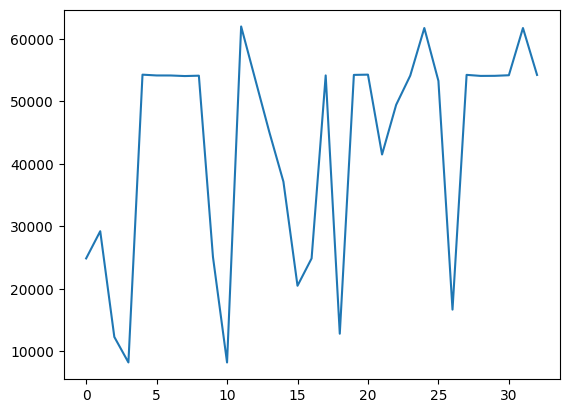

In [90]:
plt.plot(fs02_x_values,fs02_dec_value)

In [91]:
raw_fuel_data['Message'].value_counts()

Message
11000001,5,4764341348,1,1,1,10,4262,1764700542,4.6346466,-74.1208111,294,23,11010000,11110000,ON,1101100,3,3,35601077,14227,0x00000000,0,0|    5
11000001,5,4764341348,1,1,1,10,4718,1764878527,4.7436346,-74.043794,283,33,10010000,11110000,ON,1101100,3,3,35689070,14318,0x00000000,0,0|     3
11000001,5,4764341348,1,1,1,10,6711,1766170342,4.8201555,-74.0741871,186,17,10010001,00000000,ON,1101000,3,3,36290609,14166,0x00000000,0,0|    3
11000001,5,4764341348,1,1,1,10,4848,1764959933,4.6366653,-74.1191855,324,0,00110001,11110000,OFF,1101000,5,3,35718087,12798,0x00000000,0,0|    3
11000001,5,4764341348,1,1,1,10,4564,1764853978,4.7452695,-74.038277,286,8,01010000,11110000,ON,1101000,8,3,35666729,14348,0x00000000,0,0|      3
                                                                                                                                              ..
11000001,5,4764341348,1,1,1,10,5024,1765292372,4.700145,-74.069748,260,0,11100000,11110000,ON,1101000,9,3,35751810,14105,0

poz553

In [92]:
raw_fuel_data=pd.read_csv('/home/jlhb1984/py-projects/data/proing/poz553.csv',sep=';',encoding='latin1')
raw_fuel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Created  2593 non-null   object
 1   Message  2593 non-null   object
 2   Status   2593 non-null   object
dtypes: object(3)
memory usage: 60.9+ KB


In [93]:
e0x=raw_fuel_data[raw_fuel_data['Status'].str.contains('3E0')]
row_number=e0x.shape[0]

In [94]:
fs01_dec_value=[]
fs02_dec_value=[]

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E01')
    if len(e0x_aux)>0:
        fs01=(e0x_aux[aux:aux+18])
        if len(fs01)>17:
            msb=fs01[10:12]
            lsb=fs01[8:10]
            measure=msb+lsb
            fs01_dec_value.append(int(measure,16))

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E02')
    if len(e0x_aux)>0:
        fs02=e0x_aux[aux:aux+18]
        if len(fs02)>17:
            msb=fs02[10:12]
            lsb=fs02[8:10]
            measure=msb+lsb
            fs02_dec_value.append(int(measure,16))
            
        #print(fs01_cad)   

fs01_count=len(fs01_dec_value)
fs02_count=len(fs02_dec_value)
print('Fuel sesnor 1: ',fs01_dec_value,fs01_count)
print('Fuel sesnor 2: ',fs02_dec_value,fs02_count)

Fuel sesnor 1:  [3850, 3852, 36875, 3850] 4
Fuel sesnor 2:  [45577, 54043, 54212, 54155, 54103, 54065, 54079] 7


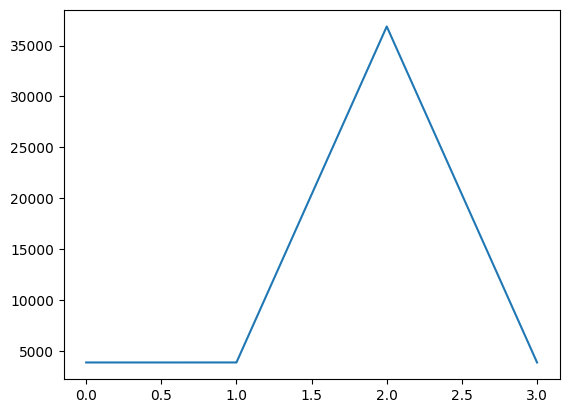

In [95]:
fs01_x_values=[]
fs02_x_values=[]

for i in range(0,fs01_count):
    fs01_x_values.append(i)
    
for i in range(0,fs02_count):
    fs02_x_values.append(i)

plt.plot(fs01_x_values,fs01_dec_value)
#plt.plot(fs02_x_values,fs02_dec_value)

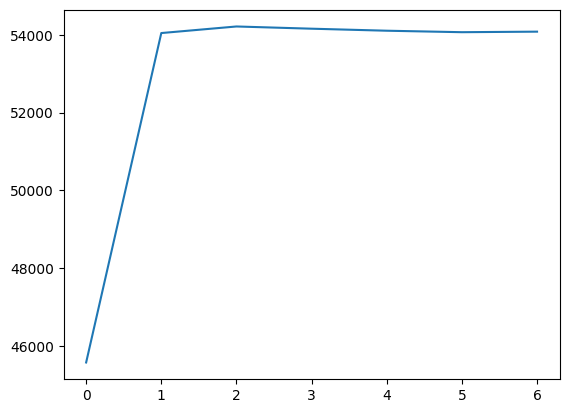

In [96]:
plt.plot(fs02_x_values,fs02_dec_value)

In [97]:
raw_fuel_data['Message'].value_counts()

Message
Empty                                                                                                                                          2400
11000001,5,4764401802,1,1,1,10,769,1765554671,4.851849,-74.1976148,83,0,11010000,11110000,ON,1101000,9,3,42830688,13649,0x00000000,0,0|           5
11000001,5,4764401802,1,1,1,10,1854,1766179661,4.7628143,-74.0697398,259,51,01010000,11110000,ON,1101100,3,3,43132901,13710,0x00000000,0,0|       2
11000001,5,4764401802,1,1,1,10,396,1764572768,4.7450438,-74.0380475,173,0,01110000,11110000,OFF,1101000,5,3,42767632,11947,0x00000000,0,0|        1
11000001,5,4764401802,1,1,1,10,397,1764587168,4.744883,-74.038163,173,0,01010000,11110000,OFF,1101000,5,3,42767632,11947,0x00000000,0,0|          1
                                                                                                                                               ... 
11000001,5,4764401802,1,1,1,10,1875,1766180997,4.7398201,-74.0930526,286,0,00010000,11110000,ON,1101000,

In [98]:
raw_fuel_data_empty=raw_fuel_data[raw_fuel_data['Message'].str.contains('Empty')]
raw_fuel_data_empty

,Created,Message,Status
50,2025-12-03 13:11:58.394,Empty,0x830547644018020101010A01BD6930333302D58404D3...
51,2025-12-03 13:12:00.538,Empty,0x830547644018020101010A01BE6930335002D564B7D3...
52,2025-12-03 13:12:00.648,Empty,0x830547644018020101010A01BF693033A902D4FA31D3...
53,2025-12-03 13:12:00.775,Empty,0x830547644018020101010A01C0693033DF02D4E124D3...
54,2025-12-03 13:12:00.884,Empty,0x830547644018020101010A01C1693033FF02D4CF1DD3...
...,...,...,...
2588,2025-12-26 15:36:03.129,Empty,0x830547644018020101010A0B60694EAB6302E9B99ED3...
2589,2025-12-26 15:46:04.491,Empty,0x830547644018020101010A0B61694EADBB02E9B965D3...
2590,2025-12-26 16:30:52.930,Empty,0x830547644018020101010A0B62694EB83D02E9BAB6D3...
2591,2025-12-26 16:33:53.487,Empty,0x830547644018020101010A0B63694EB8F002E9BD33D3...


In [99]:
hl_poz553=pd.read_csv('/home/jlhb1984/py-projects/data/proing/hlpoz553.csv',sep=';',encoding='latin1')
hl_poz553.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Secuencia       197 non-null    int64  
 1   Unidad          197 non-null    object 
 2   Eventos         197 non-null    object 
 3   Fecha           197 non-null    object 
 4   Pt. Referencia  50 non-null     object 
 5   Dirección       197 non-null    object 
 6   Velocidad       197 non-null    int64  
 7   Temperatura     0 non-null      float64
 8   Conductor       0 non-null      float64
 9   Latitud         197 non-null    float64
 10  Longitud        197 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 17.1+ KB


In [102]:
hl_poz553['Eventos'].value_counts(ascending=False)

Eventos
Conduciendo              43
Inicio de Viaje          32
Viaje detenido           30
Estacionado              23
Ignición Encendida       16
Ignición Apagada         15
Inmóvil - Detenido       14
Alerta de Inmovilidad    10
Saliendo de Landmark      8
Entrando a Landmark       6
Name: count, dtype: int64

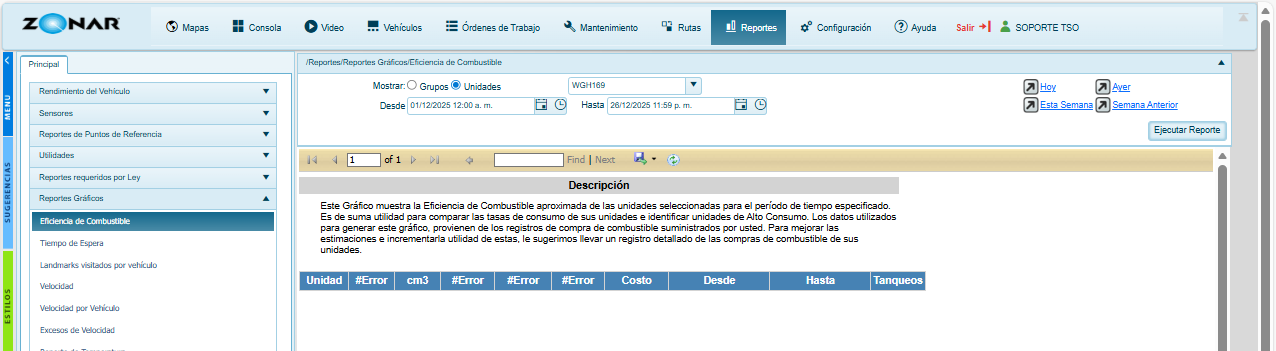